# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data_list = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data_list
        city_data_list.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | remire-montjoly
Processing Record 3 of Set 1 | tindouf
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | ahau
City not found. Skipping... Error: 'coord'
Processing Record 9 of Set 1 | lihue
Processing Record 10 of Set 1 | la ronge
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | ponta pora
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | alakurtti
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | fukuecho
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | klyuchi
Processing Record 21 of Set 1 | sinabang
Processing Record 2

Processing Record 38 of Set 4 | cannonvale
Processing Record 39 of Set 4 | kismayo
Processing Record 40 of Set 4 | fort mcmurray
Processing Record 41 of Set 4 | manfalut
Processing Record 42 of Set 4 | sisimiut
Processing Record 43 of Set 4 | tolanaro
Processing Record 44 of Set 4 | baker city
Processing Record 45 of Set 4 | kokoda
Processing Record 46 of Set 4 | pitkyaranta
Processing Record 47 of Set 4 | port alfred
Processing Record 48 of Set 4 | coxim
Processing Record 49 of Set 4 | hengchun
Processing Record 0 of Set 5 | umm al quwain city
Processing Record 1 of Set 5 | port glaud
City not found. Skipping... Error: 'coord'
Processing Record 2 of Set 5 | arkhangel'sk
Processing Record 3 of Set 5 | utrik
Processing Record 4 of Set 5 | kourou
Processing Record 5 of Set 5 | as sulayyil
Processing Record 6 of Set 5 | margaret river
Processing Record 7 of Set 5 | vorkuta
Processing Record 8 of Set 5 | yorosso
Processing Record 9 of Set 5 | hermanus
Processing Record 10 of Set 5 | bredas

Processing Record 24 of Set 8 | sicuani
Processing Record 25 of Set 8 | tartagal
Processing Record 26 of Set 8 | zyrya
Processing Record 27 of Set 8 | banda aceh
Processing Record 28 of Set 8 | tazacorte
Processing Record 29 of Set 8 | komatsu
Processing Record 30 of Set 8 | menongue
Processing Record 31 of Set 8 | kone
Processing Record 32 of Set 8 | yamada
Processing Record 33 of Set 8 | saint-philippe
Processing Record 34 of Set 8 | onega
Processing Record 35 of Set 8 | lepsy
Processing Record 36 of Set 8 | fortaleza
Processing Record 37 of Set 8 | juan griego
Processing Record 38 of Set 8 | holualoa
Processing Record 39 of Set 8 | baiti
Processing Record 40 of Set 8 | xining
Processing Record 41 of Set 8 | igarka
Processing Record 42 of Set 8 | maua
Processing Record 43 of Set 8 | rongelap
Processing Record 44 of Set 8 | nguigmi
Processing Record 45 of Set 8 | ghadamis
Processing Record 46 of Set 8 | northam
Processing Record 47 of Set 8 | tashtagol
Processing Record 48 of Set 8 | 

Processing Record 12 of Set 12 | novo aripuana
Processing Record 13 of Set 12 | yangor
City not found. Skipping... Error: 'coord'
Processing Record 14 of Set 12 | q'vareli
Processing Record 15 of Set 12 | bengkulu
Processing Record 16 of Set 12 | ad dabbah
Processing Record 17 of Set 12 | kirakira
Processing Record 18 of Set 12 | ta`u
Processing Record 19 of Set 12 | kabare
Processing Record 20 of Set 12 | chernomorskoye
Processing Record 21 of Set 12 | selebi-phikwe
Processing Record 22 of Set 12 | cabras
Processing Record 23 of Set 12 | gaspe
Processing Record 24 of Set 12 | robertsport
Processing Record 25 of Set 12 | saurimo
Processing Record 26 of Set 12 | jayapura
Processing Record 27 of Set 12 | bataipora
Processing Record 28 of Set 12 | chimoio
Processing Record 29 of Set 12 | tsiombe
Processing Record 30 of Set 12 | zakynthos
Processing Record 31 of Set 12 | bhimunipatnam
Processing Record 32 of Set 12 | tocopilla
Processing Record 33 of Set 12 | saudarkrokur
Processing Record

In [5]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data_list)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,301.14,83,75,4.63,CC,1706982133
1,remire-montjoly,4.9167,-52.2667,305.17,62,20,5.66,GF,1706982117
2,tindouf,27.6711,-8.1474,294.40,8,0,7.20,DZ,1706982201
3,puerto ayora,-0.7393,-90.3518,304.13,79,55,5.02,EC,1706982201
4,grytviken,-54.2811,-36.5092,281.88,93,100,5.23,GS,1706982132


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,301.14,83,75,4.63,CC,1706982133
1,remire-montjoly,4.9167,-52.2667,305.17,62,20,5.66,GF,1706982117
2,tindouf,27.6711,-8.1474,294.40,8,0,7.20,DZ,1706982201
3,puerto ayora,-0.7393,-90.3518,304.13,79,55,5.02,EC,1706982201
4,grytviken,-54.2811,-36.5092,281.88,93,100,5.23,GS,1706982132


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

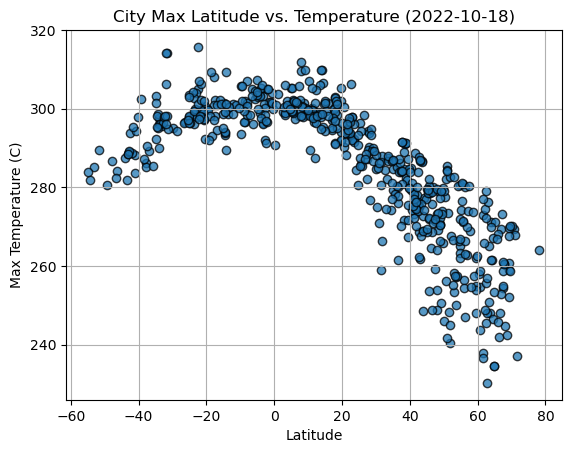

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor ='black', alpha = 0.75)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

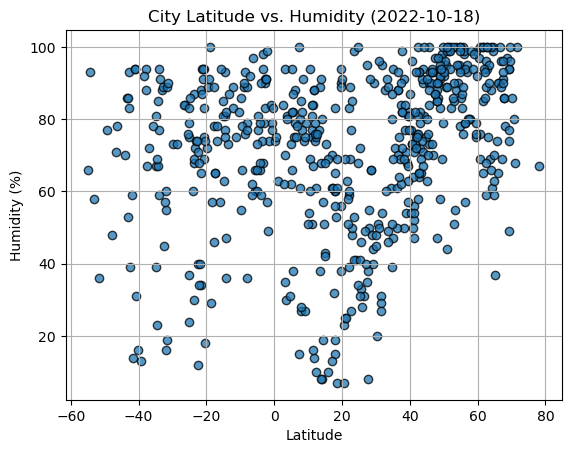

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor = 'black', alpha = 0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

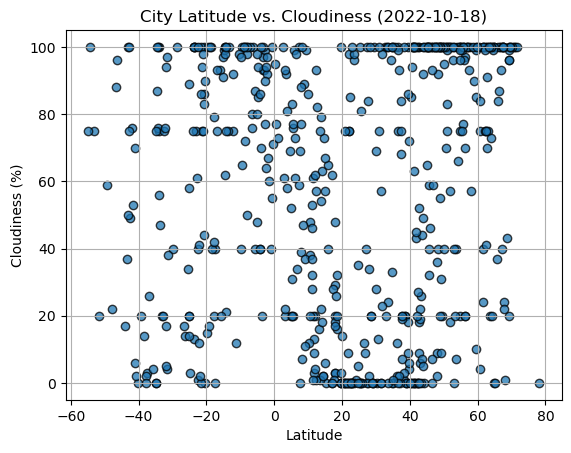

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor = 'black', alpha = 0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

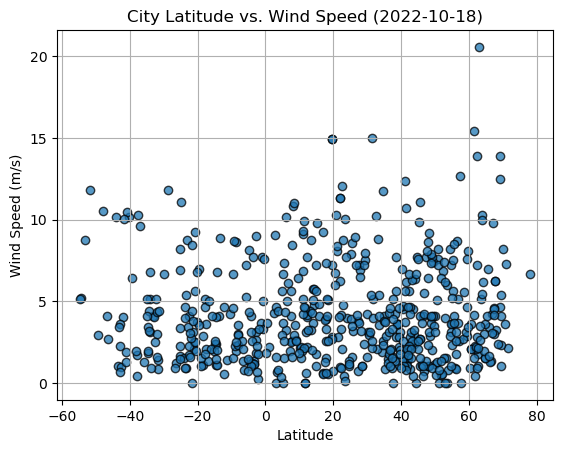

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor = 'black', alpha = 0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def plt_lin_reg(x_values, y_values, x_label, y_label, title, coordinates):
    
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    regression_line = slope * x_values + intercept
    
    plt.scatter(x_values, y_values, edgecolors = 'black', alpha = 0.75)
    
    plt.plot(x_values, regression_line, color = 'r', label = 0.75)
    
    equation = f'y = {round(slope, 2)}x + {round(intercept,  2)}'
    
    plt.annotate(equation, coordinates, xycoords = 'axes fraction', color = 'r', fontsize = 12)
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    
    plt.show()
    
    print(f'The r-value is: {round(r_value, 2)}')


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,remire-montjoly,4.9167,-52.2667,305.17,62,20,5.66,GF,1706982117
2,tindouf,27.6711,-8.1474,294.40,8,0,7.20,DZ,1706982201
5,albany,42.6001,-73.9662,275.00,64,52,2.24,US,1706982084
6,longyearbyen,78.2186,15.6401,264.06,67,0,6.69,SJ,1706982201
7,lihue,21.9789,-159.3672,293.92,59,75,11.32,US,1706981969


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,301.14,83,75,4.63,CC,1706982133
3,puerto ayora,-0.7393,-90.3518,304.13,79,55,5.02,EC,1706982201
4,grytviken,-54.2811,-36.5092,281.88,93,100,5.23,GS,1706982132
9,atafu village,-8.5421,-172.5159,302.08,76,100,8.63,TK,1706982139
10,ponta pora,-22.5361,-55.7256,305.10,40,40,4.12,BR,1706982201


###  Temperature vs. Latitude Linear Regression Plot

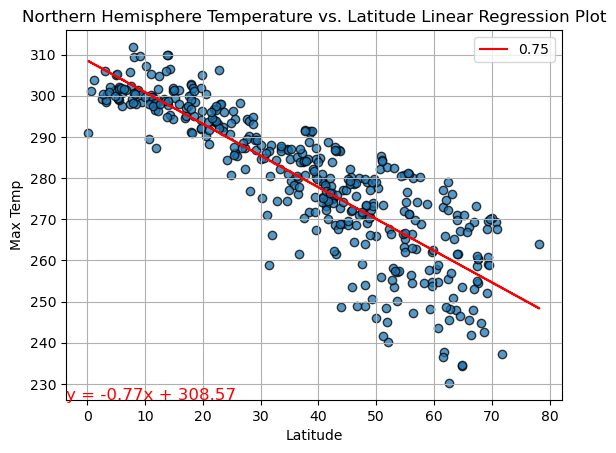

The r-value is: -0.86


In [45]:
# Linear regression on Northern Hemisphere
plt_lin_reg(north_hem_df['Lat'], north_hem_df['Max Temp'], 'Latitude', 'Max Temp', 'Northern Hemisphere Temperature vs. Latitude Linear Regression Plot', (0,0))


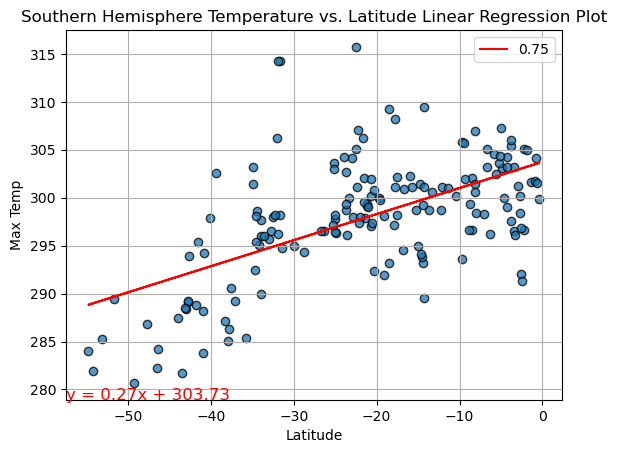

The r-value is: 0.59


In [46]:
# Linear regression on Southern Hemisphere
plt_lin_reg(south_hem_df['Lat'], south_hem_df['Max Temp'], 'Latitude', 'Max Temp', 'Southern Hemisphere Temperature vs. Latitude Linear Regression Plot', (0,0))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#The relationship between hemisphere and temperature indicates that the closer the latitude is to 0, the higher the temperature is. Both figures show a correlation via the r-values indicating a likelihood that there is a relationship.

### Humidity vs. Latitude Linear Regression Plot

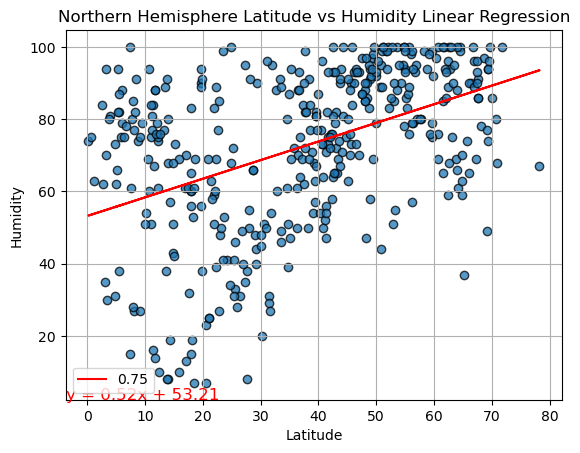

The r-value is: 0.44


In [47]:
# Northern Hemisphere
plt_lin_reg(north_hem_df['Lat'], north_hem_df['Humidity'], 'Latitude', 'Humidity', 'Northern Hemisphere Latitude vs Humidity Linear Regression', (0,0))

The r-value is: 0.0002808747046324607


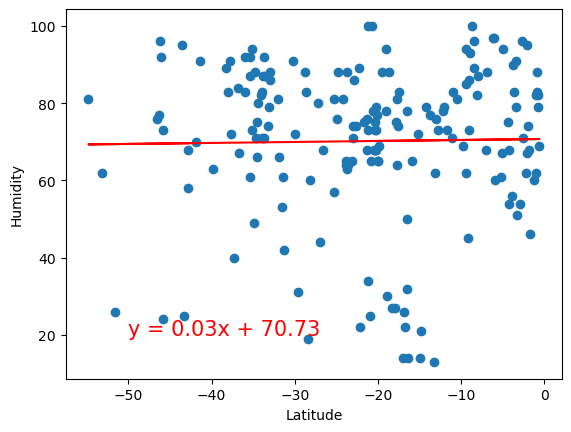

In [18]:
# Southern Hemisphere
plt_lin_reg(south_hem_df['Lat'], south_hem_df['Humidity'], 'Latitude', 'Humidity', )

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#There seems to be a relationship between the changing latitudes and northern hemisphere. However, in the southern hemisphere a relationship is harder to identify. This could be due to a lower amount of data points generated in the inital database.

### Cloudiness vs. Latitude Linear Regression Plot

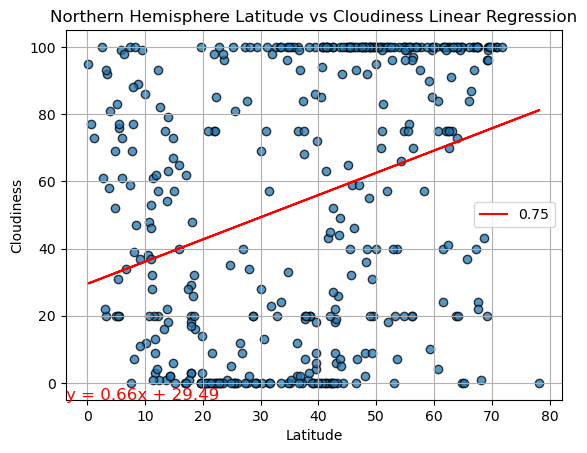

The r-value is: 0.32


In [48]:
# Northern Hemisphere
plt_lin_reg(north_hem_df['Lat'], north_hem_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Northern Hemisphere Latitude vs Cloudiness Linear Regression', (0,0))

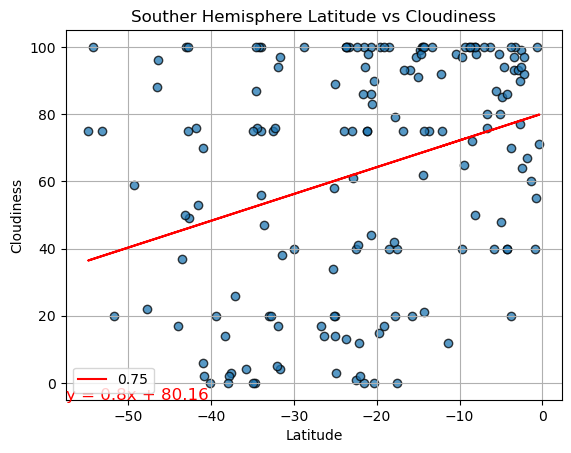

The r-value is: 0.32


In [49]:
# Southern Hemisphere
plt_lin_reg(south_hem_df['Lat'], south_hem_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Souther Hemisphere Latitude vs Cloudiness', (0,0))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#While there is a relationship between cloudiness and latitude shown in both hemispheres. It seems that this relationship indicates higher latitudes have more clouds, while inversely, the southern hemisphere has more clouds at a lower latitude.

### Wind Speed vs. Latitude Linear Regression Plot

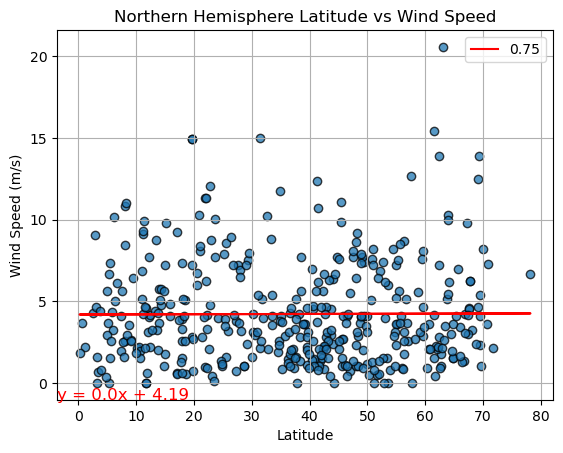

The r-value is: 0.01


In [50]:
# Northern Hemisphere
plt_lin_reg(north_hem_df['Lat'], north_hem_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', 'Northern Hemisphere Latitude vs Wind Speed', (0,0))

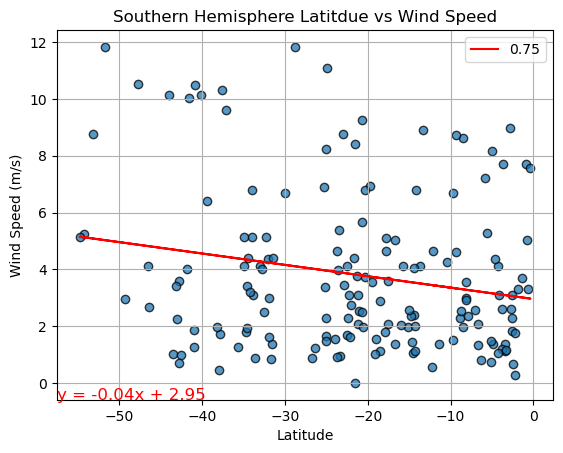

The r-value is: -0.2


In [51]:
# Southern Hemisphere
plt_lin_reg(south_hem_df['Lat'], south_hem_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', 'Southern Hemisphere Latitdue vs Wind Speed', (0,0))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#The relationship between wind speed and latitude is not as strong. In the northen hemisphere it seems there may not be one at all, while in the southern hemisphere there is a weak relationship indicating that wind speed increases with lower latitudes.